In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
import locale
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')

'ru_RU.UTF-8'

## Предобработка данных

In [111]:
df = pd.read_excel('data.xlsx')
df

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


Удаление дубликатов

In [113]:
print("Количество дублей:", df.duplicated().sum())
df.drop_duplicates(keep='first', inplace=True)

Количество дублей: 33


Обработка даты для записи в таблицу

In [114]:
# Используем пустой столбец для значения даты в таблице
df = df.rename(columns={'Unnamed: 5': 'date'})

# Заполнение значений даты
def filter(check,date): 
    return date[:3] + date[-5:] if pd.isna(check) else np.nan

df['date'] = df.apply(lambda x: filter(x.client_id, x.status), axis=1)
df['date'] = df['date'].ffill()

# Удаление пустых строк
df = df.dropna(subset=['client_id'])

Преобразование типов данных

In [115]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)
df['client_id'] = df['client_id'].astype('int64')
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format='%Y-%m-%d', errors='coerce')

Заполнение отсутствующих значений

In [116]:
df['document'] = df['receiving_date'].apply(lambda x: 'оригинал' if pd.notnull(x) else 'НЕТ')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       691 non-null    int64         
 1   sum             691 non-null    float64       
 2   status          691 non-null    object        
 3   sale            691 non-null    object        
 4   new/current     691 non-null    object        
 5   date            691 non-null    datetime64[ns]
 6   document        691 non-null    object        
 7   receiving_date  580 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 48.6+ KB


In [118]:
df

,client_id,sum,status,sale,new/current,date,document,receiving_date
1,6,11693.7,ВНУТРЕННИЙ,-,-,2021-05-01,НЕТ,NaT
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,2021-05-01,оригинал,2021-07-26
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-06-08
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-06-08
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-07-07
...,...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,2021-10-01,оригинал,2021-11-15
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,2021-10-01,НЕТ,NaT
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,2021-10-01,НЕТ,NaT
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,2021-10-01,оригинал,2021-11-08


## Вопросы

1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [119]:
status_ok_july_df = df[(df['status'] != 'ПРОСРОЧЕНО') & (df['date'] == '2021-07-01')]
summa = status_ok_july_df['sum'].sum()
print("Общая выручка за июль 2021:", round(summa, 2))

Общая выручка за июль 2021: 826622.67


2. Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [120]:
# Таблица выручки по месяцам
grouped_df = df.groupby('date')['sum'].sum().reset_index()
print(grouped_df)

        date        sum
0 2021-05-01  804871.09
1 2021-06-01  780482.71
2 2021-07-01  828600.37
3 2021-08-01  834035.99
4 2021-09-01  806482.78
5 2021-10-01  974837.39


<BarContainer object of 6 artists>

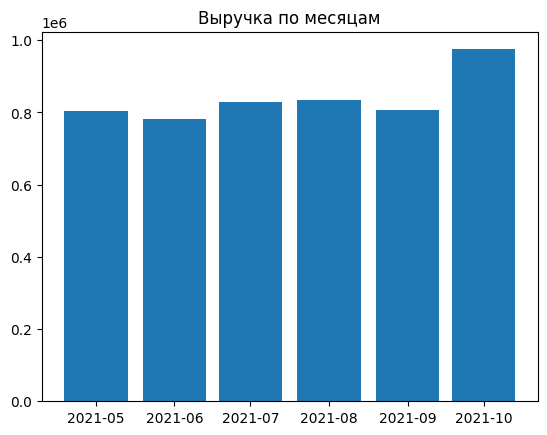

In [121]:
# Столбчатая диаграмма выручки по месяцам
plt.title(f'Выручка по месяцам')
plt.bar(grouped_df['date'], grouped_df['sum'], width=25)


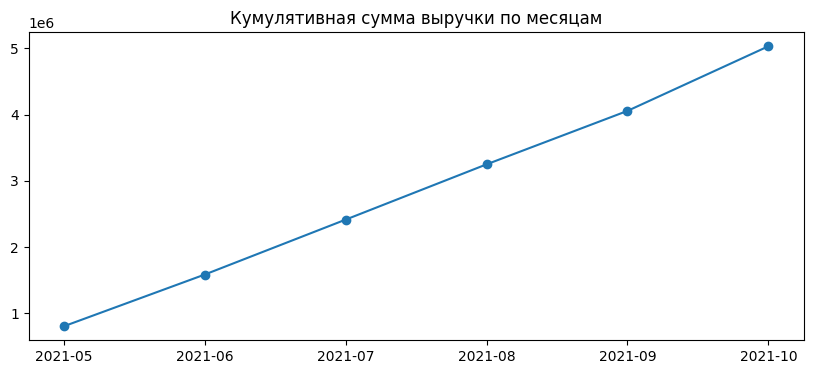

In [122]:
# График кумулятивной суммы выручки за весь период
aggregated_df = df.groupby('date')['sum'].sum().reset_index()
aggregated_df['month'] = aggregated_df['date'].dt.to_period('M')
plt.figure(figsize=(10, 4))
plt.title(f'Кумулятивная сумма выручки по месяцам')
plt.plot(aggregated_df['month'].astype(str), aggregated_df['sum'].cumsum(), marker='o')

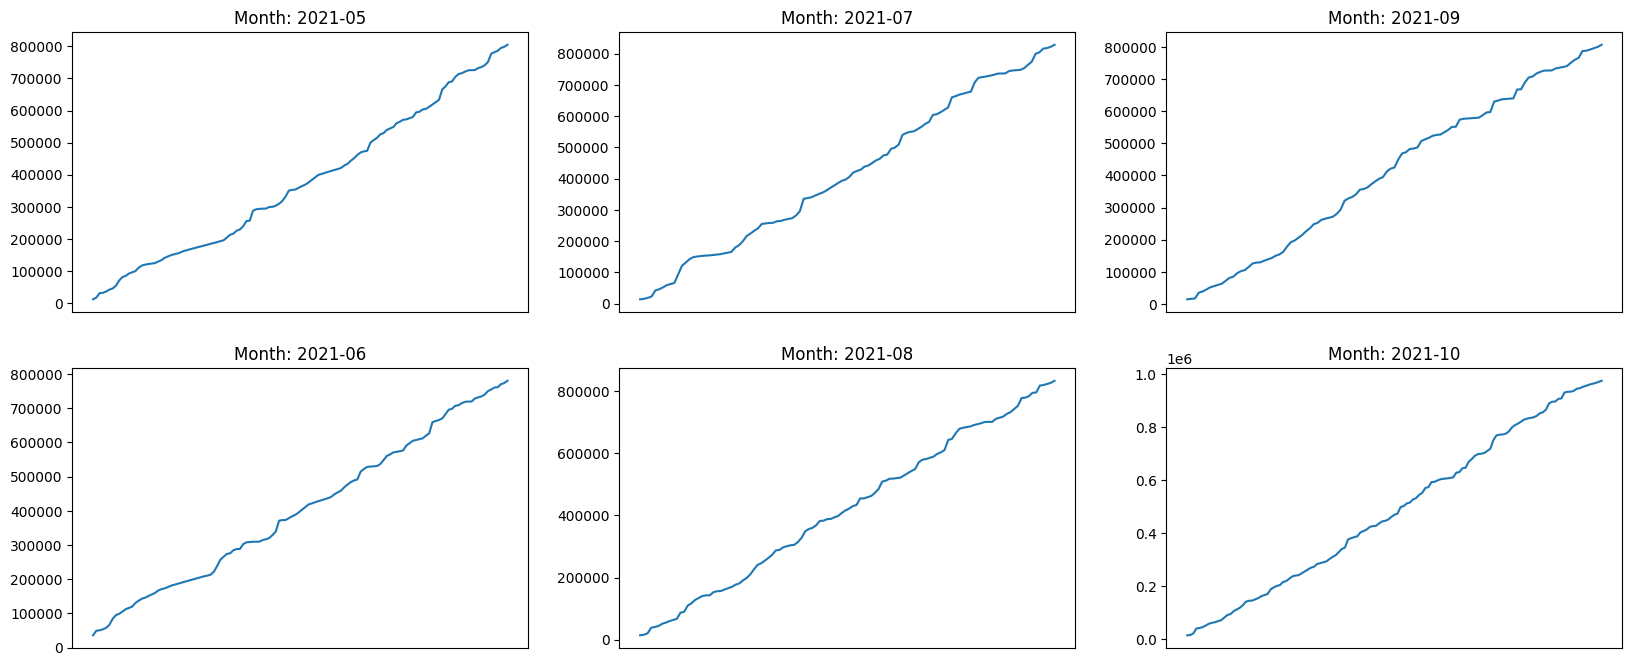

In [123]:
# Графики кумулятивной суммы по месяцам
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
months = ['2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10']
for i, month in enumerate(months):
    ax = axes[i % 2, i // 2]
    month_data = df[df['date'] == months[i]]
    ax.set_title(f'Month: {month}')
    ax.axes.get_xaxis().set_visible(False)
    ax.plot(month_data['sum'].cumsum())

3. Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [124]:
sep_manager_sales_df = df[df['date'] == '2021-09-01'].groupby('sale')['sum'].sum().reset_index()
sep_manager_sales_df.sort_values(by='sum', ascending=False)

,sale,sum
6,Смирнов,212084.60
5,Петрова,145890.76
0,Андреев,132646.30
2,Иванов,94770.60
3,Кузнецова,72228.40
8,Филимонова,59514.47
1,Васильев,49895.45
7,Соколов,35183.50
4,Михайлов,4268.70


In [125]:
manager_max_sale = sep_manager_sales_df[sep_manager_sales_df['sum'] == sep_manager_sales_df['sum'].max()]
manager_max_sale

,sale,sum
6,Смирнов,212084.6


4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [126]:
okt_deals_df = df[df['date'] == '2021-10-01'].groupby('new/current').size()
okt_deals_df

new/current
новая      35
текущая    95
dtype: int64

5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [127]:
may_doc_df = df[(df['date'] == '2021-05-01') & (df['receiving_date'] >= '2021-06-01') & (df['receiving_date'] < '2021-07-01')].shape[0]
print("Количество оригиналов договоров по майским сделкам, полученных в июле:", may_doc_df)

Количество оригиналов договоров по майским сделкам, полученных в июле: 77


## Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. 

Вычислите остаток каждого из менеджеров на 01.07.2021.

In [128]:
rest_bonus_for_july = df[(df['date'] <= '2021-06-01') & (df['receiving_date'] > '2021-07-01')]
rest_bonus_for_july

,client_id,sum,status,sale,new/current,date,document,receiving_date
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,2021-05-01,оригинал,2021-07-26
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-07-07
6,20,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,2021-05-01,оригинал,2021-07-15
7,21,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,2021-05-01,оригинал,2021-10-13
12,32,7353.9,ОПЛАЧЕНО,Филимонова,текущая,2021-05-01,оригинал,2021-07-09
...,...,...,...,...,...,...,...,...
253,281,5733.7,ОПЛАЧЕНО,Селиванов,текущая,2021-06-01,оригинал,2021-07-22
254,282,953.7,ОПЛАЧЕНО,Селиванов,новая,2021-06-01,оригинал,2021-07-16
255,284,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,2021-06-01,оригинал,2021-09-08
256,286,3453.7,ОПЛАЧЕНО,Филимонова,текущая,2021-06-01,оригинал,2021-07-22


In [129]:
# Расчет остатка для каждого из менеджеров за новые сделки
new_sales = rest_bonus_for_july[(rest_bonus_for_july['status'] == 'ОПЛАЧЕНО') & (rest_bonus_for_july['new/current'] == 'новая')].groupby('sale')['sum'].sum().reset_index()
new_sales['bonus'] = new_sales['sum'] * 0.07
new_sales[['sale', 'bonus']]

,sale,bonus
0,Васильев,187.509
1,Петрова,2877.448
2,Селиванов,4336.913
3,Смирнов,213.759
4,Филимонова,727.468


In [130]:
# Расчет остатка для каждого из менеджеров за текущие сделки
current_sales = rest_bonus_for_july[(rest_bonus_for_july['status'] != 'ПРОСРОЧЕНО') & (rest_bonus_for_july['new/current'] == 'текущая')].copy()
current_sales['bonus'] = current_sales['sum'].apply(lambda x: x * 0.05 if x > 10000 else x * 0.03)
current_sales = current_sales.groupby('sale')['bonus'].sum().reset_index()
current_sales

,sale,bonus
0,Андреев,3820.6577
1,Васильев,766.3680
2,Иванов,5366.6690
3,Кузнецова,4496.9501
4,Петрова,7893.2994
5,Селиванов,901.9410
6,Смирнов,6663.6870
7,Соколов,269.2110
8,Филимонова,1590.4899


In [131]:
# Результирующая таблица с остатками за текущие и новые сделки по каждому менеджеру
manager_sales = pd.merge(new_sales, current_sales, on='sale', how='outer').fillna(0)
manager_sales['bonus'] = manager_sales['bonus_x'] + manager_sales['bonus_y']
manager_sales['bonus'] = manager_sales['bonus'].round(2)
manager_sales[['sale', 'bonus']].sort_values(by='bonus', ascending=False)

,sale,bonus
4,Петрова,10770.75
6,Смирнов,6877.45
2,Иванов,5366.67
5,Селиванов,5238.85
3,Кузнецова,4496.95
0,Андреев,3820.66
8,Филимонова,2317.96
1,Васильев,953.88
7,Соколов,269.21
